In [5]:
import os 
import glob
import time
import numpy as np
import utils as ut
import helpers as hp
import ipywidgets as widgets 
from pynwb import NWBHDF5IO
from scipy import io as sio
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
from scipy.fft import fft, fftfreq
%matplotlib inline

In [2]:
# select file 
fPath='/Users/duuta/ppp/data/testing'
aPath=glob.glob(fPath+"/natimg2800_M1*")  # >5
tPath=glob.glob(fPath+"/*.nwb")
aPath.extend(tPath)

In [13]:
x

Select(options=('/Users/duuta/ppp/data/testing/natimg2800_M170717_MP034_2017-09-11.mat', '/Users/duuta/ppp/dat…

In [17]:
tt = widgets.Dropdown(
    options=['1', '2', '3'],
    value=None,
    description='Number:',
    disabled=False,
)

In [18]:
tt

Dropdown(description='Number:', options=('1', '2', '3'), value=None)

In [4]:
# select scale: normal | log default normal
scale = "normal"

In [87]:
# select file for reading 
x = sio.loadmat(aPath[3], simplify_cells=True)
f= NWBHDF5IO(tPath[0], mode='r')
nwbfile = f.read()
dta0 = nwbfile.acquisition['lickPiezo'].data[()]

In [88]:
# need to figure out the time window for this. 

In [ ]:
# Plot the data 
# Visual (histogram) data 
# allow select of log/normal scale

# Visualize the computations of autocorrelations

# visualize fourier components

# add alpha fit 

# stringer stats, variances spectrum (compute PCA), plot trajectories, and alpha
# If data is temporal, project to two PCs and plot the trajections
# own statistics


In [6]:
n = len(aPath)
apl = []
ypreds = []
for i in range(n):
    xx = io.loadmat(aPath[i], simplify_cells=True)
    res, spn, idx = hp.unbox(xx)
    rs = hp.denoise_resp(res, spn)
    rss = hp.dupSignal(rs, idx) 
    _ss = ut.shuff_cvPCA(rss)
    _ss = _ss.mean(axis=0)
    a, ypred = hp.get_alpha_fit(_ss, np.arange(10, 5e2).astype(int))
    apl.append(a)

In [ ]:
rs.max()

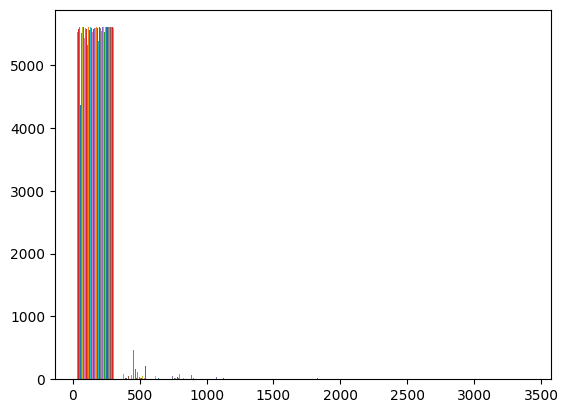

In [8]:
plt.hist(res);
# fact that the activity follows a power law means that is skewed.
# 

(array([9.616e+03, 3.090e+02, 7.700e+01, 4.400e+01, 1.800e+01, 8.000e+00,
        5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.        ,  241.97550964,  483.95101929,  725.92651367,
         967.90203857, 1209.87756348, 1451.85302734, 1693.82861328,
        1935.80407715, 2177.77954102, 2419.75512695]),
 <BarContainer object of 10 artists>)

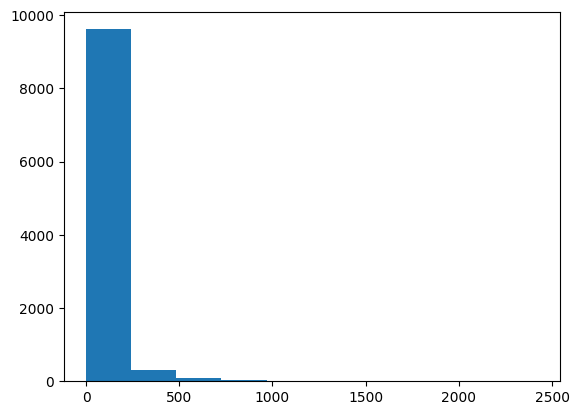

In [10]:
plt.hist(res[0, :])

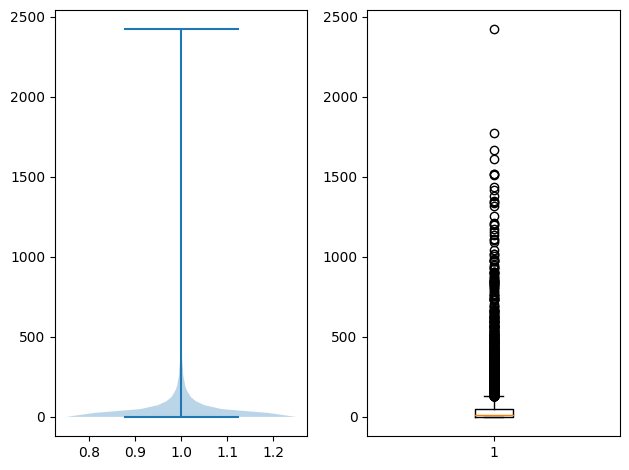

In [12]:
plt.subplot(1, 2, 1)
plt.violinplot(res[0, :]);
plt.subplot(1, 2, 2)
plt.boxplot(res[0, :]);
plt.tight_layout()

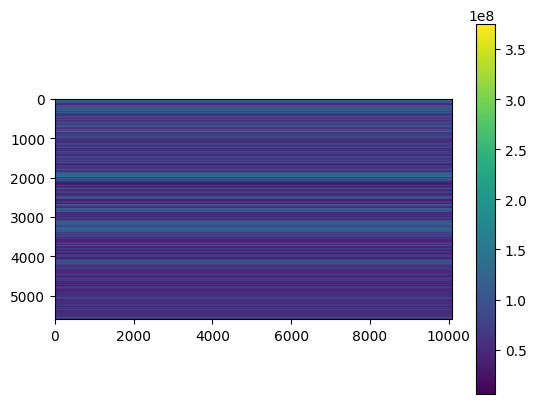

In [15]:
# autocorrelations 
# need to set figure size 
# check the data meta: incl. brain area, time of recording, etc

aucorr = np.empty_like(res)
N = res.shape[0]
for i in range(N):
    aucorr[i, :] = np.correlate(res[i, :], res[i, :])
plt.imshow(aucorr)
plt.colorbar()

def autoCorr(x):
    """returns the autocorrelations of X """
    y = np.empty_like(x)
    for i in range(x.shape[0]):
        y[i, : ] = np.correlate(x[i, :], x[i, :])
    return y

In [51]:
def createSmoothy(n=1000, w=1):
    xx = random.randn(2*n, )
    xxf = []

    for i in range(n):
        xxf.append(mean(xx[i:i+w]))
    return np.array(xxf)

In [57]:
yy  = np.array([createSmoothy(w=i) for i in range(10)])

In [58]:
cy = np.array([np.correlate(j, j, mode='full') for j in yy])

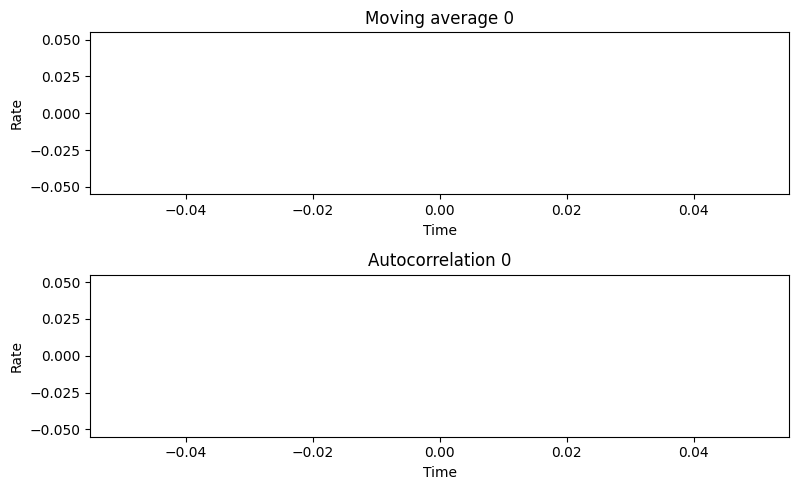

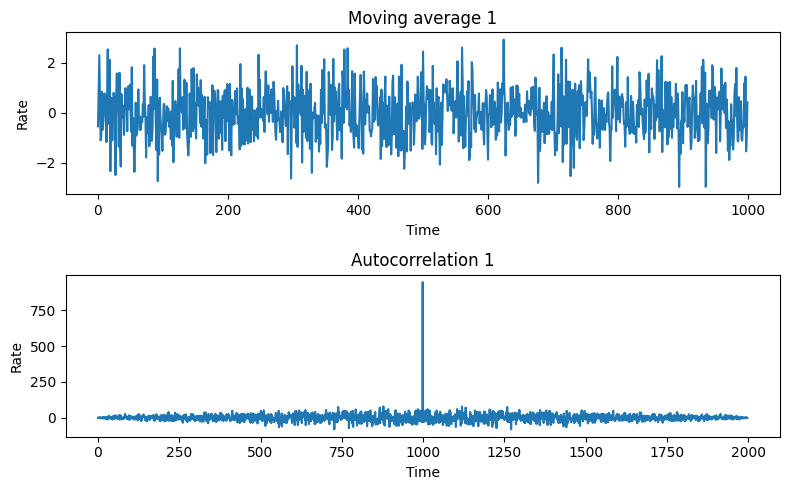

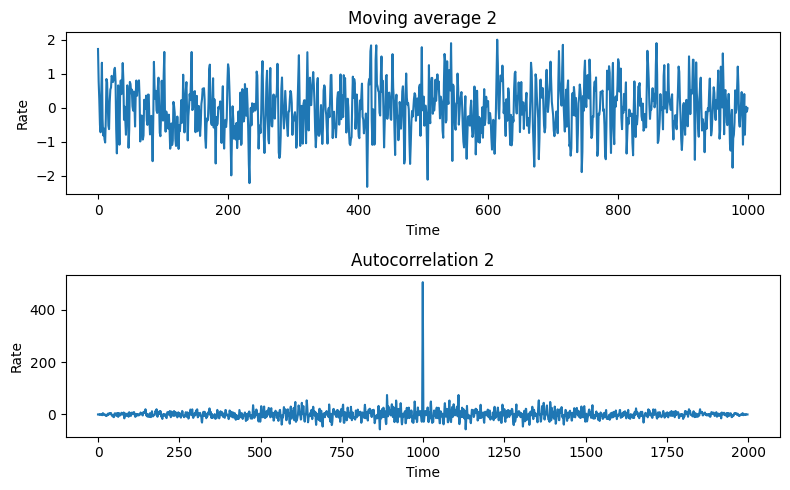

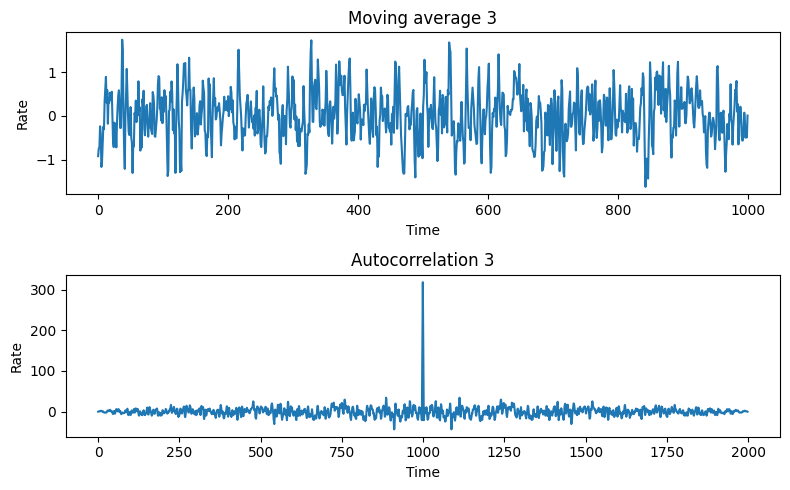

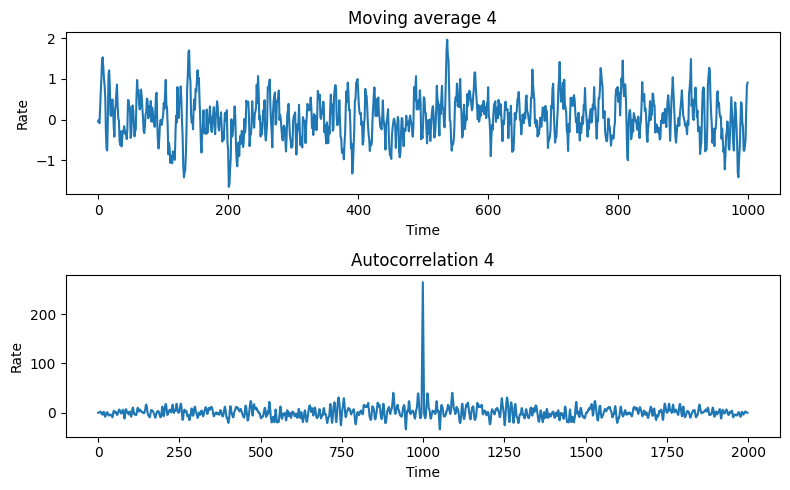

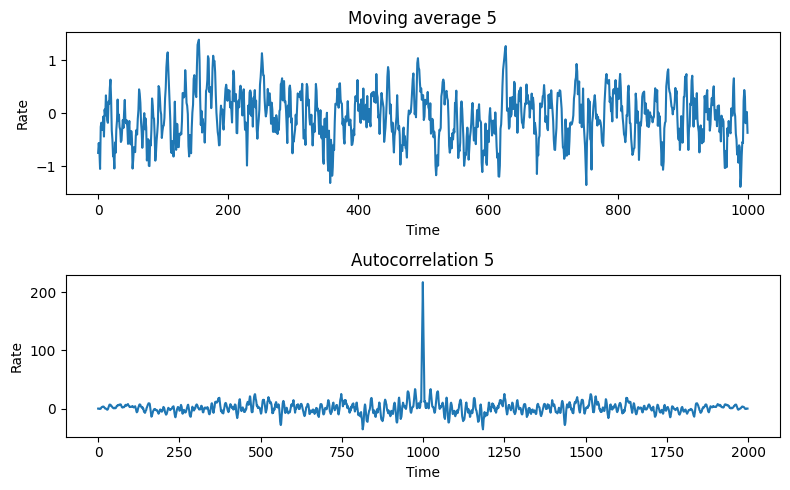

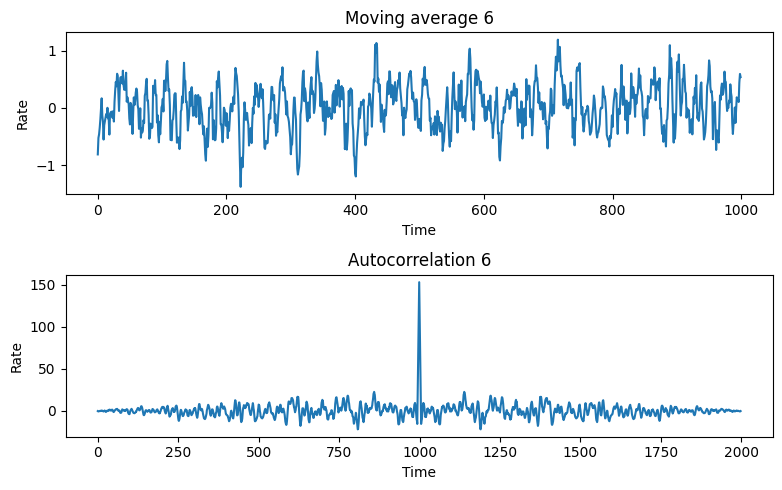

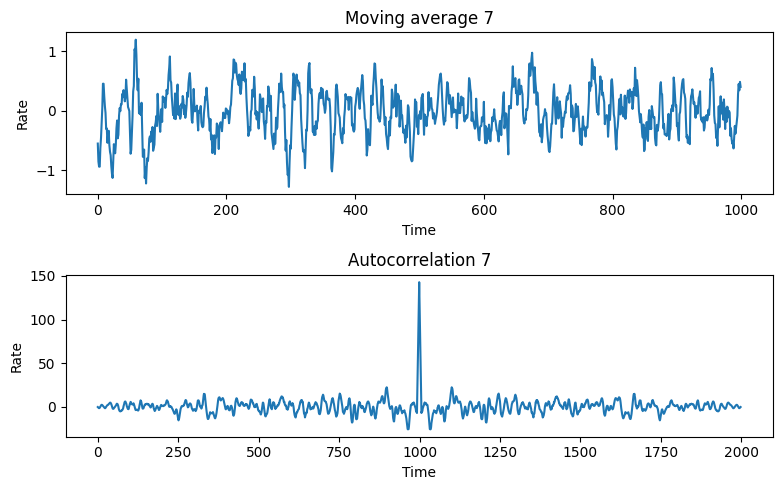

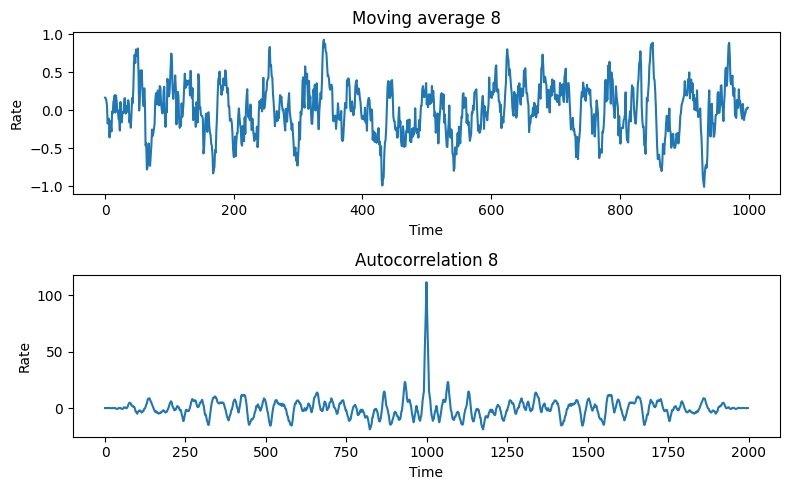

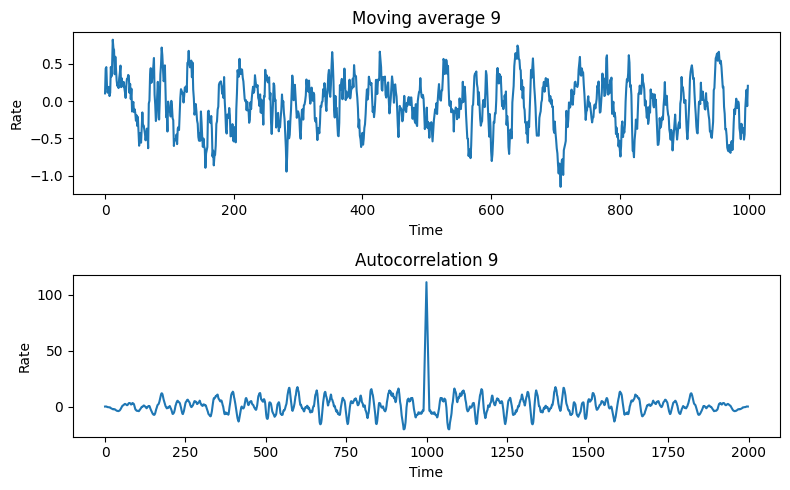

In [62]:
for k in range(10):
    which_w=k
    fig, ax = plt.subplots(nrows= 2, ncols=1, figsize=(8, 5))

    ax[0].plot(yy[which_w])
    ax[0].set_title(F'Moving average {which_w}')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Rate')
    ax[1].plot(cy[which_w])
    ax[1].set_title(F'Autocorrelation {which_w}')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Rate')

    plt.tight_layout()

In [40]:
x = np.array([random.randn(1000,) + a* np.sin((pi * 2/100) * arange(1000)) for a in linspace(0, 1, 5)])
x.shape

(5, 1000)

In [42]:
cx = [np.correlate(y, y, mode='full') for y in x ]

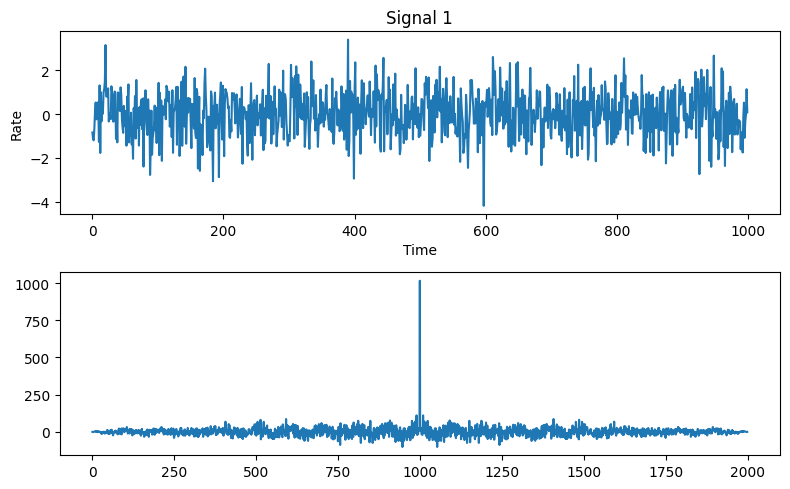

In [49]:
which_signal=1
fig, ax = plt.subplots(nrows= 2, ncols=1, figsize=(8, 5))

ax[0].plot(x[which_signal])
ax[0].set_title(F'Signal {which_signal}')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Rate')
ax[1].plot(cx[which_signal])
plt.tight_layout()
#ax[1].plot()

In [35]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots 

In [29]:
cx = np.correlate(x, x, mode='full')

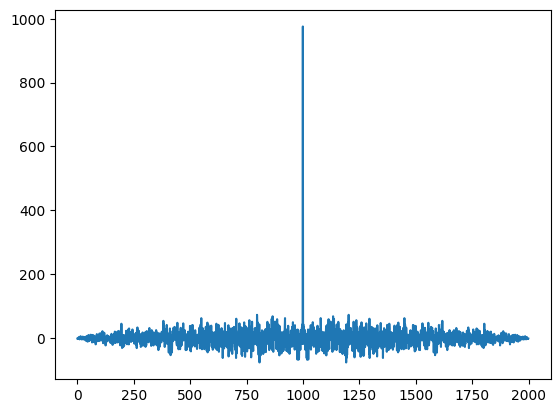

In [30]:
plt.plot(cx)

In [ ]:
u,s, _ = np.linalg.svd(res)

In [ ]:
# render with random matrix or use PC vectors (u)

In [ ]:
# 
s_ = hp.normalize_activity(s)
loglog(s_)
plot()

In [ ]:
# get alpha and fit the line.

In [ ]:
# trajectories usn
_basis = u[:2]
pop = _basis @ res
plot(pop[0].T, pop[1])

In [ ]:
# power of spectrum vs freq 
auf = fft(aucorr) #  fourier transform of the autocorrelation 

sr = 3 # sample rate
dur = 60 # durartion 

ns= dur * sr

xf = fftfreq(ns, 1.0/sr)

plot(np.abs(auf));

In [ ]:
rs[0, :]

In [ ]:
t[0, :]

In [ ]:
plt.plot(['a', 'b', 'c', 'd', 'e'], np.sort(apl), '*');
plt.xlabel('datasets')
plt.ylabel('value of Alpha')


# could add labels later... 

In [ ]:
# diff stats same data
u = rs.mean()
sd = rs.std()
xx = rs[0, :, :]
cor = np.corrcoef(xx)

print(F'The mean {u}, sDeviation {sd}')
plt.imshow(cor);

In [ ]:
plt.imshow(rs[0, :, :])

In [ ]:
 # attempt whitening 

In [ ]:
z = io.loadmat('/Users/duuta/ppp/data/stringer/natimg2800_M160825_MP027_2016-12-14.mat', simplify_cells=True)

In [ ]:
z['db']

In [ ]:
zes, zpn, zdx = unbox(z)
zs = denoise_resp(zes, zpn)
zss = dupSignal(zs, zdx) 

In [ ]:
def plotting(x, y, scale):
    
    if scale  = "log":
        plt.loglog(x, y, )
    else:
        plt.plot()